<a href="https://colab.research.google.com/github/Muskiee-04/Deep-Learning-experiments/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="The-Northcap-University-NCU-logo.png">

In [1]:
pip install tensorflow

In [2]:
# You can safely ignore any warnings on importing this
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [3]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101)
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [4]:
y = 2*x + b + noise

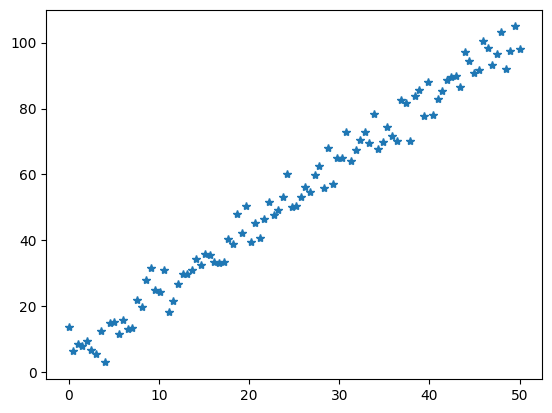

In [5]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [8]:
!pip install tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense

In [9]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [11]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5442.8789
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5554.4365
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5055.0112
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5376.6528 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5315.5127 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4888.3174 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.5151 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4749.1460 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5119.3096
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4784.6465
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4822.9736  
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5057.9961 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5040.7930 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4665.2744 
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [12]:
x_for_predictions = np.linspace(0,50,1000)

In [13]:
y_predicted = model.predict(x_for_predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


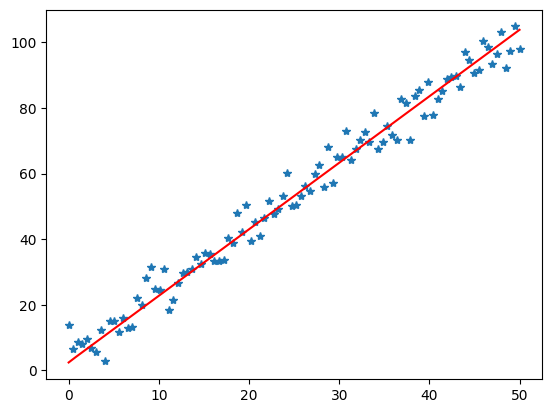

In [14]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [16]:
# Labels we do know
prediction_for_true_y = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [17]:
mean_squared_error(y,prediction_for_true_y)

17.929336833064003

In [18]:
mean_absolute_error(y,prediction_for_true_y)

3.4393654113277874

 Notice how MSE value was being reported out by Keras during training!

 Is this a good error value? Really depends on the context!